In [1]:
import json 

In [2]:
DIR_PATH = "/Users/given/projects/sound-symbolism/results/logit_lens"

WORD_GROUP = "common"
IS_CORRECT = "is_correct"
PROBS = "probs"

ORIGINAL = "original"
AUDIO = "audio"
IPA = "ipa"
ORIGINAL_AND_AUDIO = "original_and_audio"
IPA_AND_AUDIO = "ipa_and_audio"

In [3]:
def load_logit_lens_file(input_type):
    file_path = f"{DIR_PATH}/{input_type}_common.json"
    with open(file_path, 'r') as file:
        logit_lens_results = json.load(file)
    
    return logit_lens_results

In [4]:
original_file = load_logit_lens_file(ORIGINAL)
ipa_file = load_logit_lens_file(IPA)
audio_file = load_logit_lens_file(AUDIO)
original_and_audio_file = load_logit_lens_file(ORIGINAL_AND_AUDIO)
ipa_and_audio_file = load_logit_lens_file(IPA_AND_AUDIO)

In [5]:

# intersection keys for all 
intersection_keys = list(
    set(original_file.keys()) & set(ipa_file.keys()) & set(audio_file.keys()) & set(original_and_audio_file.keys()) & set(ipa_and_audio_file.keys())
)

In [6]:
def format_results(logit_lens_results, keys):
    out = {}
    
    for key in keys:
        is_correct = None
        probs = []
        for layer_id, v in logit_lens_results[key].items():
            if isinstance(v, bool): 
                is_correct = v
            else:
                probs.append(v["choice"]["prob"])
        
            out[key] = {
                IS_CORRECT: is_correct,
                PROBS: probs,
            }
    
    return out
    

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def plot_probs_by_key(total_results, key, input_type, log_scale=False):
    result = total_results[key]
    
    is_correct = result[IS_CORRECT]
    probs = result[PROBS]
    
    lang, word, dim = key.split("_")
    title = f"{word} ({lang})  : {input_type} : {is_correct}"
    
    data = np.array(probs)
    y1 = data[:, 0]
    y2 = data[:, 1]
    x = np.arange(len(y1))
    
    # Pick colors for each curve
    color1 = 'red'
    color2 = 'blue'
    
    plt.figure(figsize=(5, 2))
    
    # Plot curves
    plt.plot(x, y1, label=f'{dim.split("-")[0]}', color=color1)
    plt.plot(x, y2, label=f'{dim.split("-")[1]}', color=color2)
    plt.ylim(0, 1.00)
    
    # Max point for y1
    max_idx_y1 = np.argmax(y1)
    max_val_y1 = y1[max_idx_y1]
    plt.scatter(max_idx_y1, max_val_y1, color=color1, s=100, zorder=5)
    plt.text(max_idx_y1, max_val_y1, f"{max_val_y1:.3g}",
             color=color1, fontsize=10, ha='left', va='bottom')
    
    # Max point for y2
    max_idx_y2 = np.argmax(y2)
    max_val_y2 = y2[max_idx_y2]
    plt.scatter(max_idx_y2, max_val_y2, color=color2, s=100, zorder=5)
    plt.text(max_idx_y2, max_val_y2, f"{max_val_y2:.3g}",
             color=color2, fontsize=10, ha='left', va='bottom')
    
    # Last point of y1
    last_x1 = x[-1]
    last_y1 = y1[-1]
    plt.scatter(last_x1, last_y1, color=color1, marker='^', s=100, zorder=5)
    plt.text(last_x1, last_y1, f"{last_y1:.3g}",
             color=color1, fontsize=10, ha='left', va='bottom')
    
    # Last point of y2
    last_x2 = x[-1]
    last_y2 = y2[-1]
    plt.scatter(last_x2, last_y2, color=color2, marker='^', s=100, zorder=5)
    plt.text(last_x2, last_y2, f"{last_y2:.3g}",
             color=color2, fontsize=10, ha='left', va='bottom')
    
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    if log_scale:
        plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

In [8]:
original_results = format_results(original_file, intersection_keys)
audio_results = format_results(audio_file, intersection_keys)
original_and_audio_results = format_results(original_and_audio_file, intersection_keys)


In [9]:
i = 0

index: 1
key: en_arf_active-passive


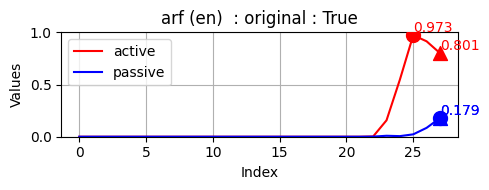

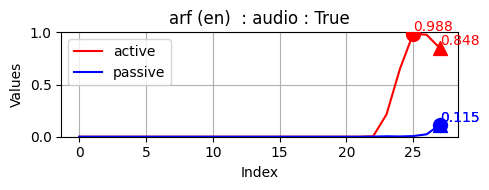

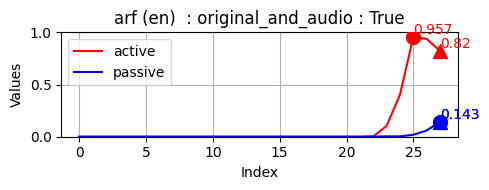

In [10]:
i += 1
key = intersection_keys[i]

print(f"index: {i}")
print(f"key: {key}")
plot_probs_by_key(original_results, key, ORIGINAL)
plot_probs_by_key(audio_results, key, AUDIO)
plot_probs_by_key(original_and_audio_results, key, ORIGINAL_AND_AUDIO)


In [11]:
words = []
for key in intersection_keys:
    lang, word, dim = key.split("_")

    is_correct_original = original_results[key][IS_CORRECT]
    is_correct_audio = audio_results[key][IS_CORRECT]
    is_correct_original_and_audio = original_and_audio_results[key][IS_CORRECT]
    
    
    words.append({
        "word": word,
        "dim": dim,
        ORIGINAL : is_correct_original,
        AUDIO : is_correct_audio,
        ORIGINAL_AND_AUDIO : is_correct_original_and_audio,
        "logits" : {
            ORIGINAL : original_file[key],
            AUDIO: audio_file[key],
            ORIGINAL_AND_AUDIO : original_and_audio_file[key],
        }
    })
        

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(words)
df.head()

,word,dim,original,audio,original_and_audio,logits
0,argh,tense-relaxed,True,True,True,{'original': {'0': {'top': {'prob': 0.08642578...
1,arf,active-passive,True,True,True,{'original': {'0': {'top': {'prob': 0.10546875...
2,ai,simple-complex,True,True,True,{'original': {'0': {'top': {'prob': 0.11035156...
3,atishoo,ordinary-unique,True,False,True,{'original': {'0': {'top': {'prob': 0.09179687...
4,aw,harsh-mellow,False,False,False,{'original': {'0': {'top': {'prob': 0.08740234...


In [14]:
df.to_csv('logit_lens_data.csv', index=False)

In [15]:
only_original = df[df['original'] == True]
only_audio = df[df['audio'] == True]
only_orignal_and_audio = df[df['original_and_audio'] == True]
    
print(f"only original: {len(only_original)}")
print(f"only audio: {len(only_audio)}")
print(f"original and audio: {len(only_orignal_and_audio)}")

only original: 63
only audio: 58
original and audio: 64


In [16]:
print(df['dim'].value_counts())



dim
abrupt-continuous            9
simple-complex               8
tense-relaxed                6
harsh-mellow                 6
strong-weak                  6
realistic-fantastical        6
ordinary-unique              5
pleasant-unpleasant          5
hard-soft                    4
active-passive               3
happy-sad                    3
structured-disorganized      2
good-bad                     2
big-small                    2
dangerous-safe               2
sharp-round                  2
exciting-calming             2
fast-slow                    2
heavy-light                  2
interesting-uninteresting    1
solid-nonsolid               1
rugged-delicate              1
Name: count, dtype: int64


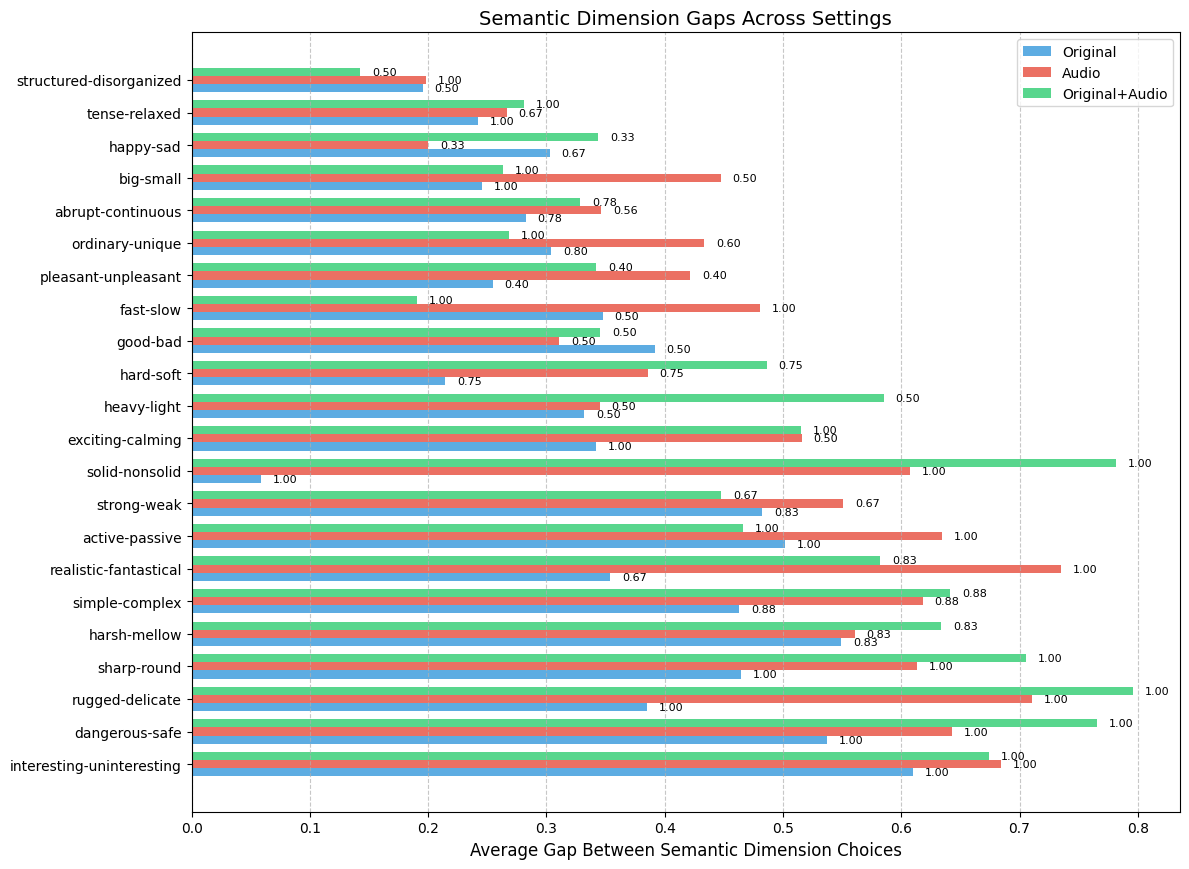

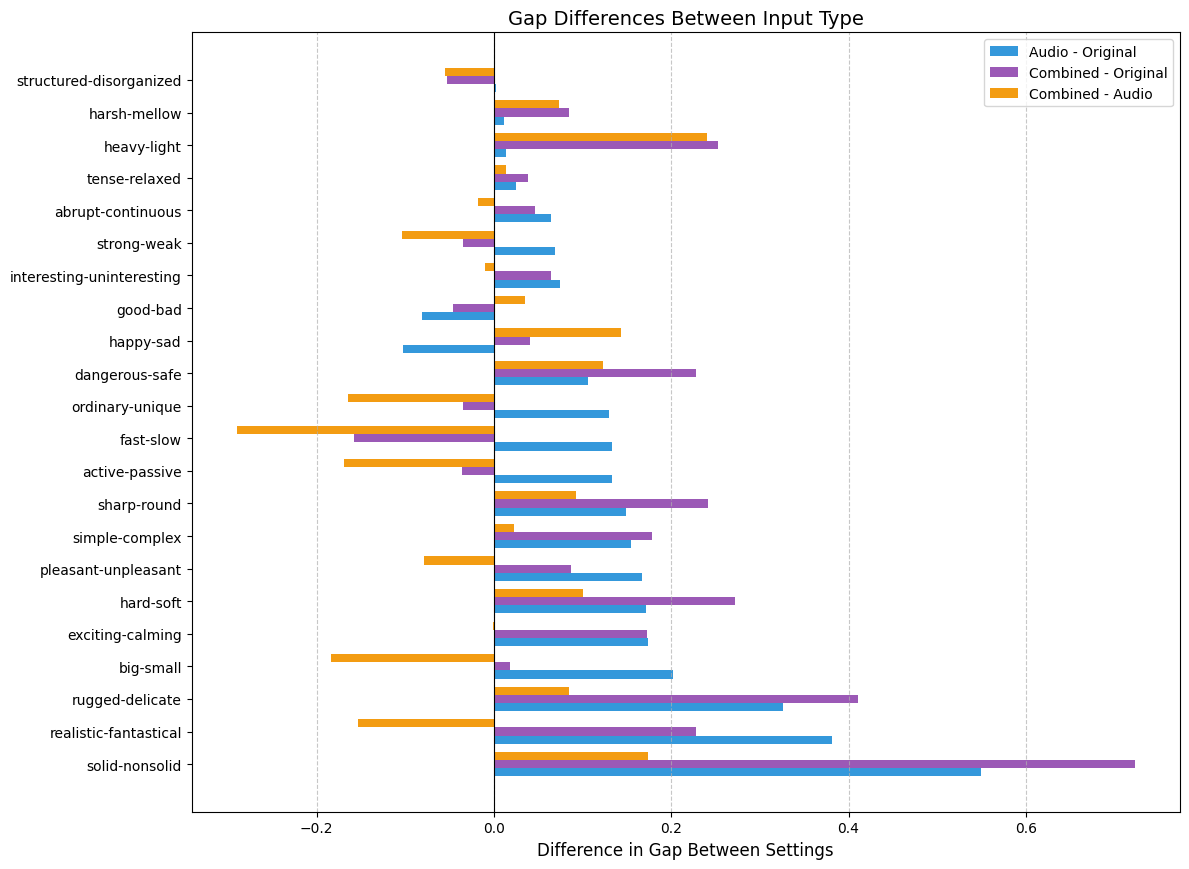

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict


def analyze_semantic_dimension_gaps(df):
    def _calculate_choice_gap(logits):
        """Calculate the absolute gap between two choice probabilities in the final layer."""
        final_layer = max(int(k) for k in logits if k.isdigit())
        probs = logits[str(final_layer)]["choice"]["prob"]
        return abs(probs[0] - probs[1])

    def _initialize_dim_result():
        """Return an initialized result dictionary for a semantic dimension."""
        return {
            'original': [],
            'audio': [],
            'original_and_audio': [],
            'correct_original': 0,
            'correct_audio': 0,
            'correct_original_and_audio': 0,
            'count': 0
        }

    def _update_dim_result(result, row):
        """Update a semantic dimension result entry based on a row of data."""
        result['original'].append(_calculate_choice_gap(row['logits']['original']))
        result['audio'].append(_calculate_choice_gap(row['logits']['audio']))
        result['original_and_audio'].append(_calculate_choice_gap(row['logits']['original_and_audio']))
        result['correct_original'] += int(row['original'])
        result['correct_audio'] += int(row['audio'])
        result['correct_original_and_audio'] += int(row['original_and_audio'])
        result['count'] += 1
        
    def _finalize_dim_statistics(results):
        for dim, val in results.items():
            val['avg_original'] = np.mean(val['original'])
            val['avg_audio'] = np.mean(val['audio'])
            val['avg_original_and_audio'] = np.mean(val['original_and_audio'])
            val['acc_original'] = val['correct_original'] / val['count']
            val['acc_audio'] = val['correct_audio'] / val['count']
            val['acc_original_and_audio'] = val['correct_original_and_audio'] / val['count']

    
    results = defaultdict(_initialize_dim_result)
    for dim, group in df.groupby('dim'):
        for _, row in group.iterrows():
            _update_dim_result(results[dim], row)
    _finalize_dim_statistics(results)
    
    return results


def plot_semantic_dimension_gaps(results, top_n=15):
    df = pd.DataFrame([
        {
            'dim': dim,
            'original': val['avg_original'],
            'audio': val['avg_audio'],
            'original_and_audio': val['avg_original_and_audio'],
            'acc_original': val['acc_original'],
            'acc_audio': val['acc_audio'],
            'acc_original_and_audio': val['acc_original_and_audio'],
            'count': val['count'],
            'avg_gap': np.mean([val['avg_original'], val['avg_audio'], val['avg_original_and_audio']])
        }
        for dim, val in results.items()
    ])
    df = df.sort_values('avg_gap', ascending=False).head(top_n)

    fig, ax = plt.subplots(figsize=(12, max(8, len(df) * 0.4)))
    width = 0.25
    x = np.arange(len(df))
    colors = ['#3498db', '#e74c3c', '#2ecc71']

    bars = [
        ax.barh(x - width, df['original'], width, label='Original', color=colors[0], alpha=0.8),
        ax.barh(x, df['audio'], width, label='Audio', color=colors[1], alpha=0.8),
        ax.barh(x + width, df['original_and_audio'], width, label='Original+Audio', color=colors[2], alpha=0.8)
    ]

    for i in range(len(df)):
        for j, bar in enumerate([bars[0], bars[1], 
                                 bars[2]]):
            acc_key = ['acc_original', 'acc_audio', 'acc_original_and_audio'][j]
            acc = df.iloc[i][acc_key]
            width = bar[i].get_width()
            x_text = width + 0.01 if width > 0.05 else width + 0.02  # 더 크게 띄움
            ha = 'left' if width > 0.05 else 'right'  # 짧은 경우 오른쪽 정렬
            ax.text(x_text, bar[i].get_y() + bar[i].get_height()/2, f"{acc:.2f}",
                    va='center', ha=ha, fontsize=8, color='black')  # 컬러 고정

    ax.set_xlabel('Average Gap Between Semantic Dimension Choices', fontsize=12)
    ax.set_yticks(x)
    ax.set_yticklabels(df['dim'], fontsize=10)
    ax.set_title('Semantic Dimension Gaps Across Settings', fontsize=14)
    ax.legend()
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


def plot_semantic_dimension_gap_differences(results, top_n=15):
    df = pd.DataFrame([
        {
            'dim': dim,
            'audio_vs_original': val['avg_audio'] - val['avg_original'],
            'combined_vs_original': val['avg_original_and_audio'] - val['avg_original'],
            'combined_vs_audio': val['avg_original_and_audio'] - val['avg_audio'],
            'avg_gap': np.mean([val['avg_original'], val['avg_audio'], val['avg_original_and_audio']]),
            'count': val['count']
        }
        for dim, val in results.items()
    ])
    df['abs_audio_vs_original'] = df['audio_vs_original'].abs()
    df = df.sort_values('abs_audio_vs_original', ascending=False).head(top_n)

    fig, ax = plt.subplots(figsize=(12, max(8, len(df) * 0.4)))
    width = 0.25
    x = np.arange(len(df))
    colors = ['#3498db', '#9b59b6', '#f39c12']

    ax.barh(x - width, df['audio_vs_original'], width, label='Audio - Original', color=colors[0])
    ax.barh(x, df['combined_vs_original'], width, label='Combined - Original', color=colors[1])
    ax.barh(x + width, df['combined_vs_audio'], width, label='Combined - Audio', color=colors[2])

    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    ax.set_xlabel('Difference in Gap Between Settings', fontsize=12)
    ax.set_yticks(x)
    ax.set_yticklabels(df['dim'], fontsize=10)
    ax.set_title('Gap Differences Between Input Type', fontsize=14)
    ax.legend()
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Example usage:
top_n = 25
result = analyze_semantic_dimension_gaps(df)
plot_semantic_dimension_gaps(result, top_n)
plot_semantic_dimension_gap_differences(result, top_n)